**Unveiling the Power of K-Means Clustering in Python: Revolutionizing Facebook Live Selling in Thailand & UCI ML Repository!**

**Important Libraries**

In [218]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline


**Data Citation: Dehouche,Nassim. (2019). Facebook Live Sellers in Thailand. UCI Machine Learning Repository. https://doi.org/10.24432/C5R60S.**

**Read the Data**

In [219]:
import pandas as pd

# link of the direct dataset file
file_url = "/content/Live.csv"

# Read the dataset using pandas
data = pd.read_csv(file_url)

# Display the first few rows of the dataset
print(data.head())



                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0      NaN      

**Collecting Information**

In [220]:
# Check dataset shape
print(data.shape)

# Summary of dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


# Display the first few rows of the dataset
print(data.head())



(7050, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object

**Prepare the Data**

['video' 'photo' 'link' 'status']
photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64


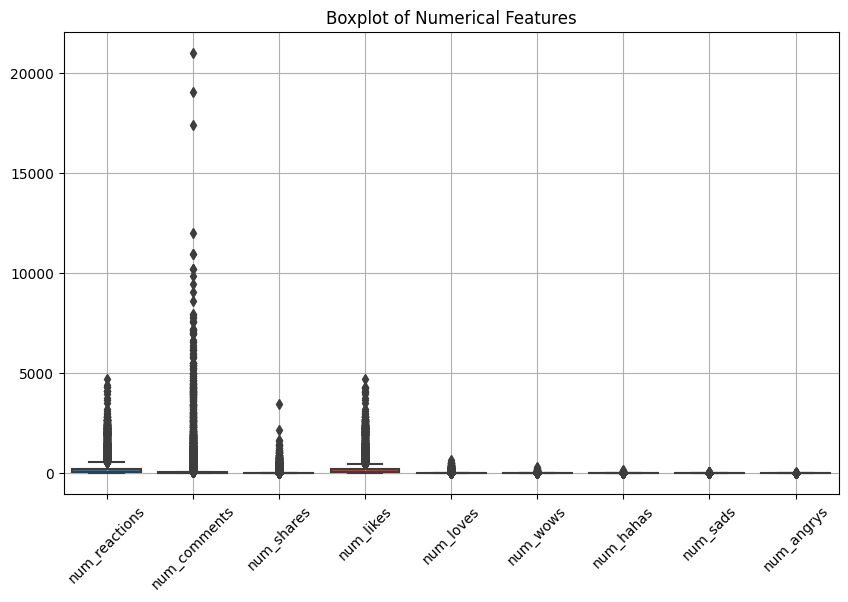

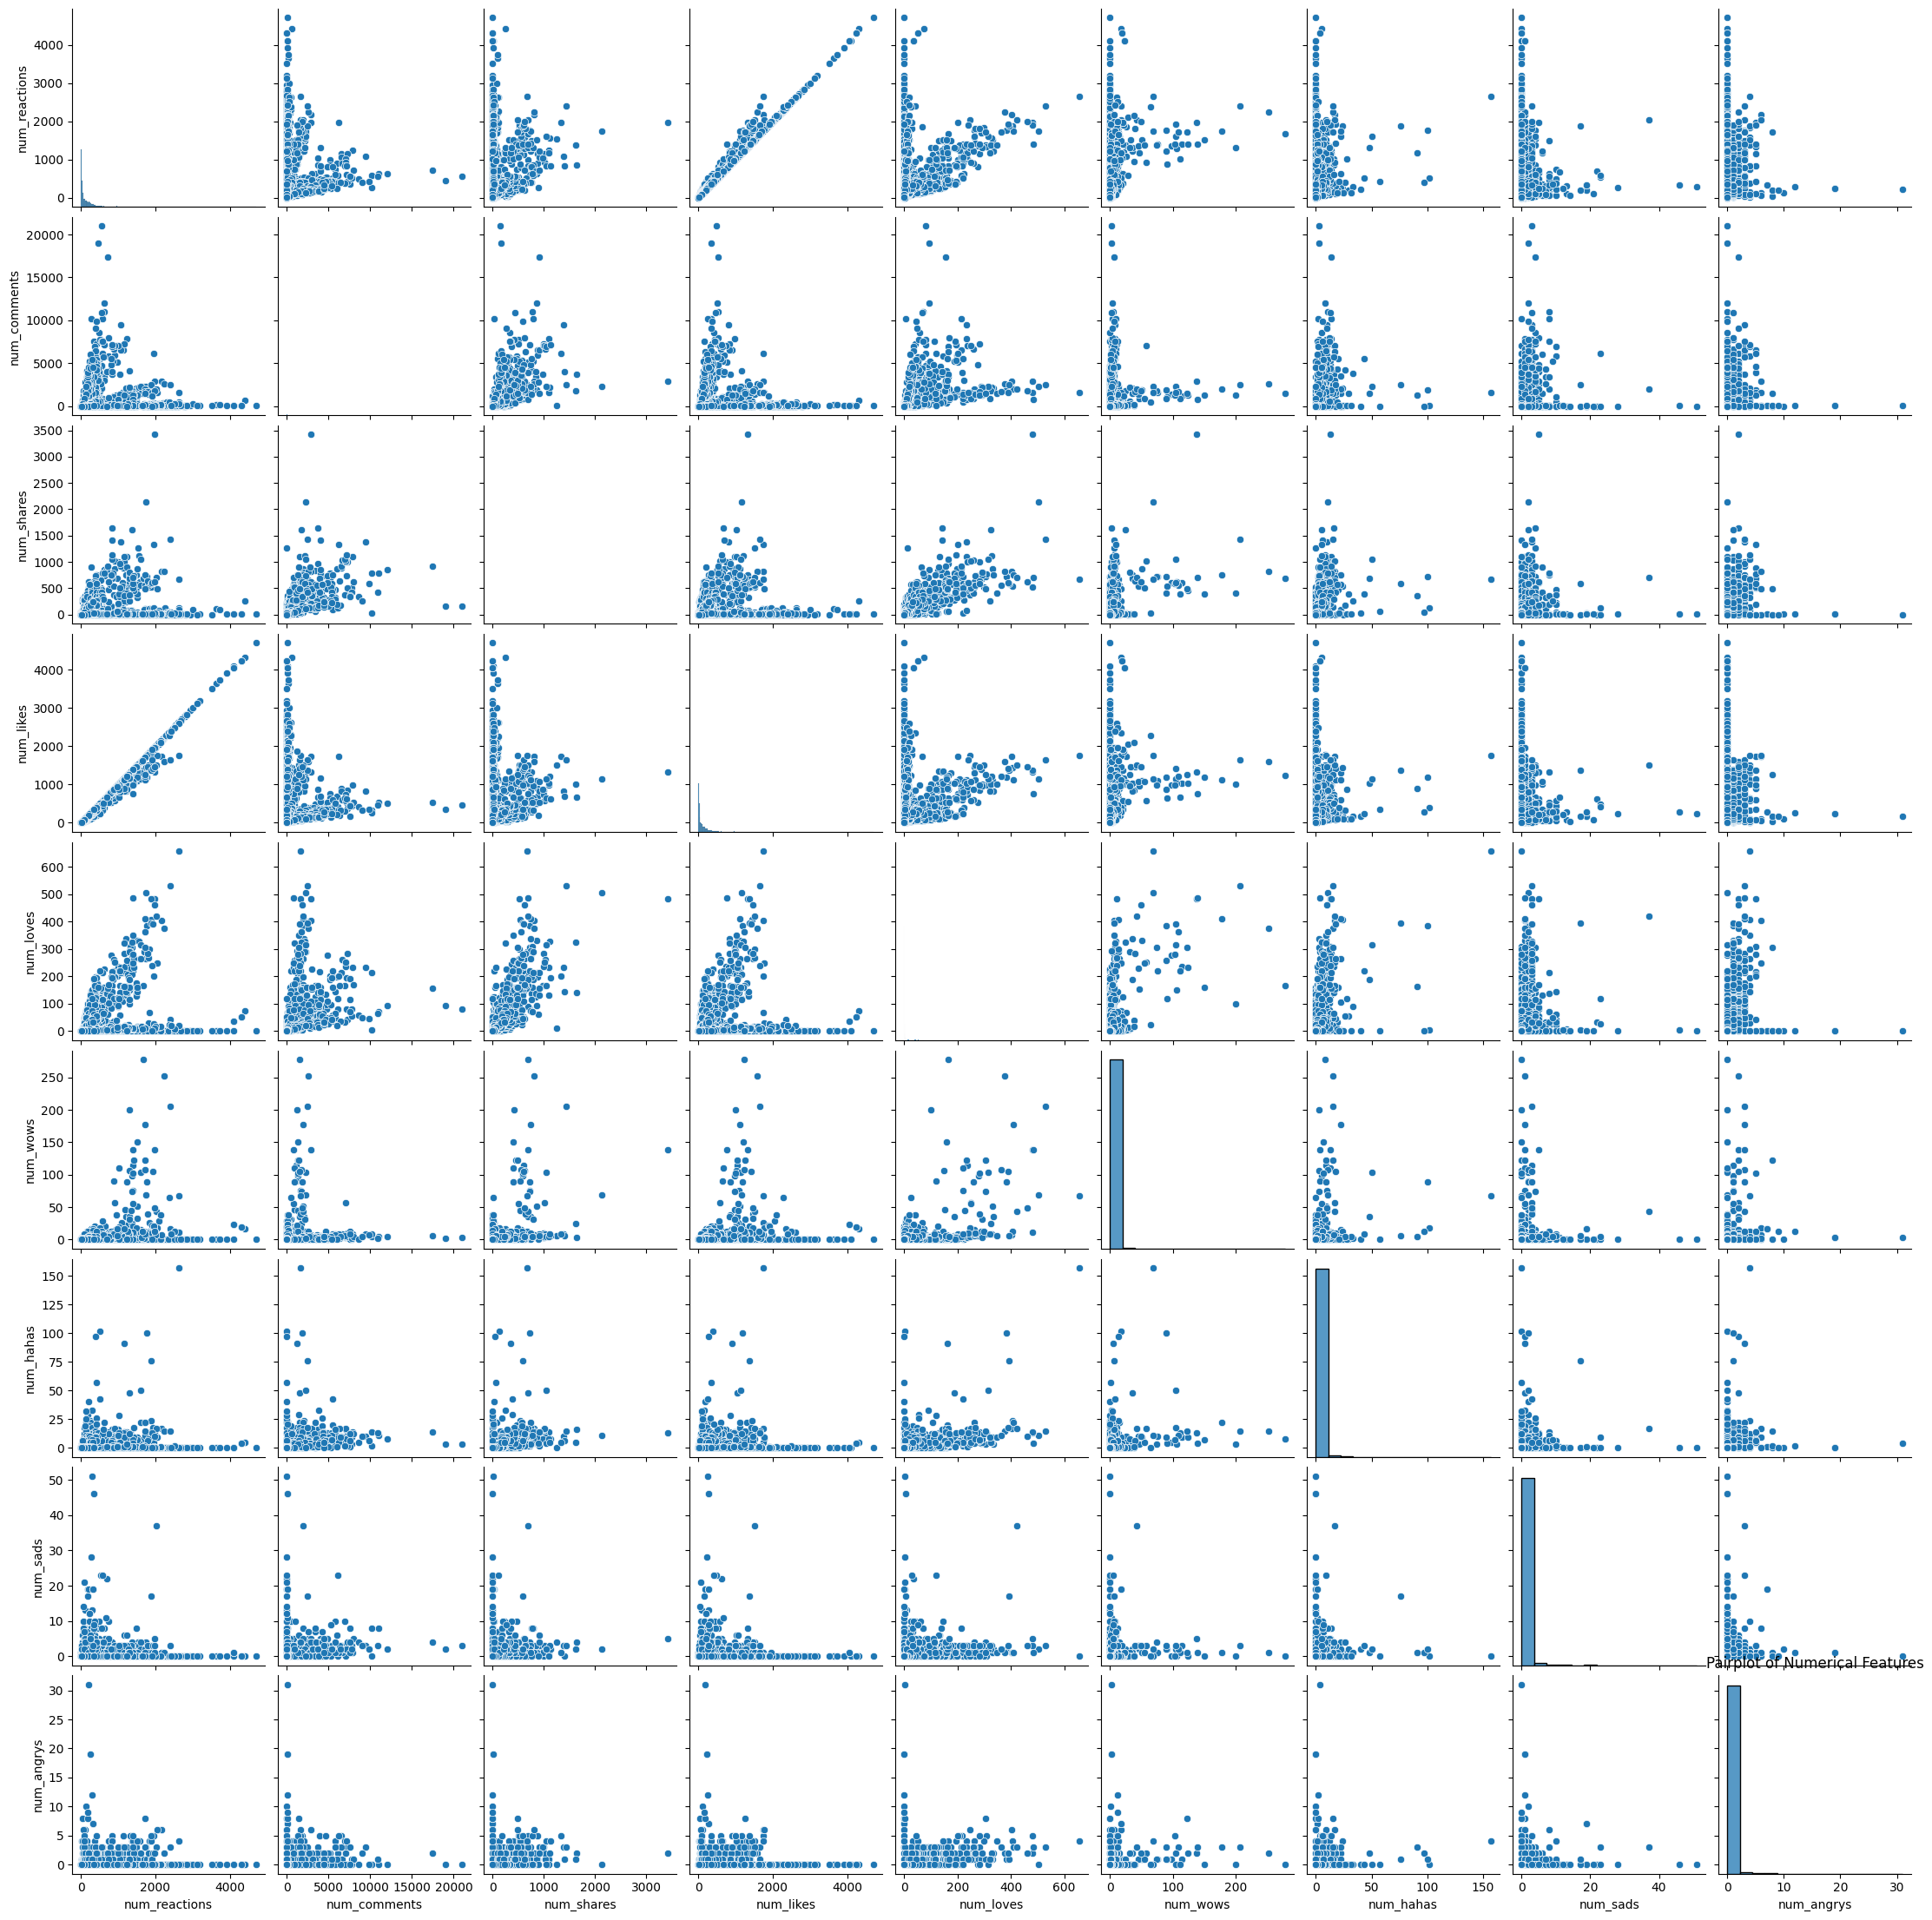

In [221]:

# Drop redundant columns
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
# Drop 'status_id' and 'status_published'
data.drop(['status_id', 'status_published'], axis=1, inplace=True)

# Explore categorical variables
print(data['status_type'].unique())
print(data['status_type'].value_counts())

plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.grid(True)  # Turning grid on
plt.savefig('numerical_features_boxplot.pdf', format='pdf')  # Saving as a PDF
plt.show()

# Visualizing relationships between numerical features
sns.pairplot(data)
plt.title('Pairplot of Numerical Features')
plt.show()


In [222]:
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [223]:
X = data

y = data['status_type']

**LabelEncoding**

In [224]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [225]:

X.head()

X.info()

cols = X.columns
cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

**Data Scaling**

In [226]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [227]:
X = pd.DataFrame(X, columns=[cols])

In [228]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


***KMeans Algorithm***

In [229]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [230]:
kmeans.cluster_centers_
kmeans.inertia_

237.75726404419646

**Check the Performance**

In [231]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


**Finding Optimal Clusters using Elbow Method**

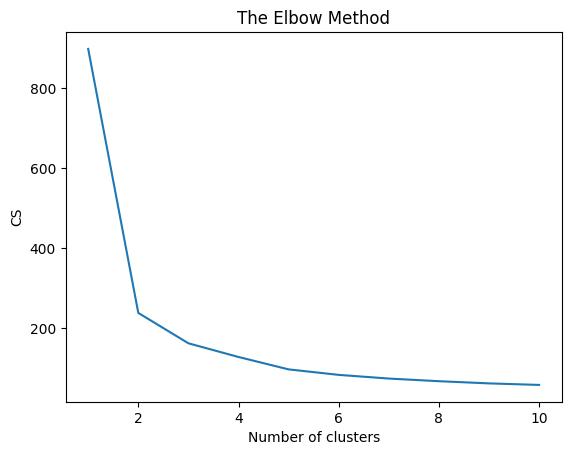

In [232]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cs = [KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X).inertia_ for i in range(1, 11)]
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


**Checking the Results at Different Number of Clusters in the following 3 Cells**

In [241]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

correct_labels = sum(y == labels)
accuracy = accuracy_score(y, labels)

print(f"Result: {correct_labels} out of {y.size} samples were correctly labeled.")
print(f"Accuracy score: {accuracy:.2f}")


Result: 66 out of 300 samples were correctly labeled.
Accuracy score: 0.22


In [242]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 44 out of 300 samples were correctly labeled.
Accuracy score: 0.15


In [243]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 86 out of 300 samples were correctly labeled.
Accuracy score: 0.29


**Tuning using GridSEarch**

In [244]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV


# Define the parameters to search
param_grid = {'n_clusters': [3, 4, 5, 6, 7]}  # Example range of clusters to try

# Create a KMeans instance
kmeans = KMeans(random_state=0)

# Use GridSearchCV to find the best number of clusters
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5)
grid_search.fit(X)

# Get the best estimator and its parameters
best_kmeans = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Use the best estimator for clustering
best_kmeans.fit(X)
labels = best_kmeans.labels_


Best parameters: {'n_clusters': 7}


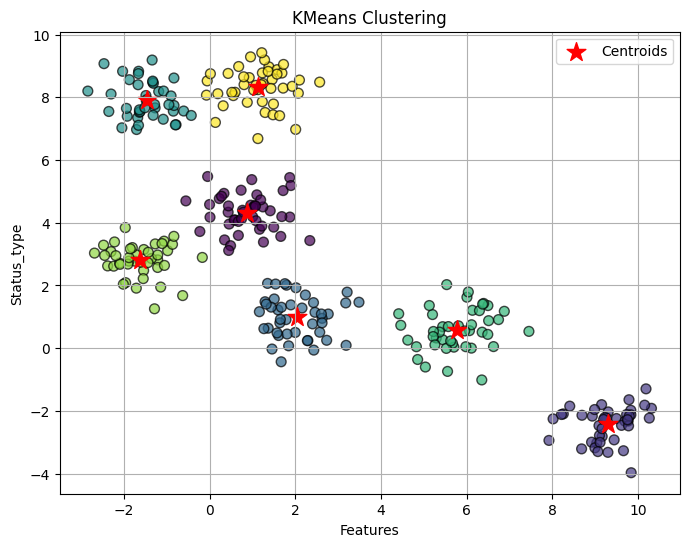

In [245]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Create KMeans model and fit it to the data
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)

# Obtain cluster labels
labels = kmeans.labels_

# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))

# Plotting the data points with colors according to cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k')

# Plotting the centroids of the clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='*', label='Centroids')

plt.title('KMeans Clustering')
plt.legend()
plt.grid(True)  # Add grid

# Adding x and y axis labels
plt.xlabel('Features')
plt.ylabel('Status_type')

# Save as PDF with high resolution
plt.savefig('kmeans_clustering on Facebook Selling.pdf', dpi=300, bbox_inches='tight')

plt.show()


The average silhouette_score is : 0.6545078114867405


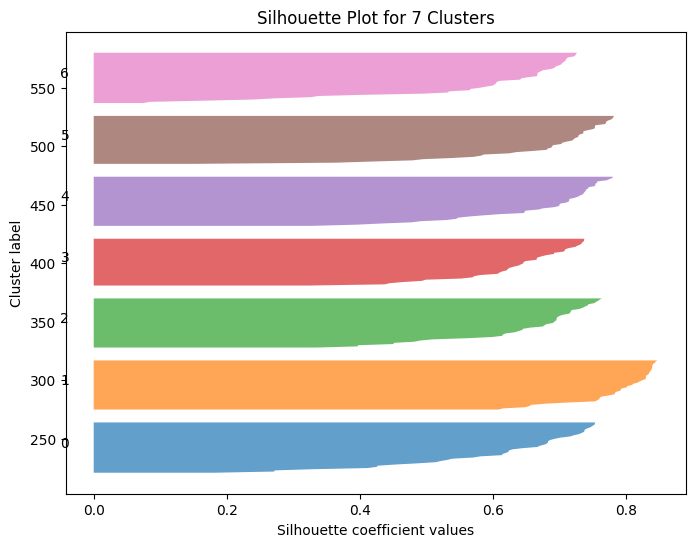

In [249]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate silhouette scores
silhouette_vals = silhouette_samples(X, labels)

# Calculate the overall silhouette score
silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plotting silhouette plot for 7 clusters
plt.figure(figsize=(8, 6))
for i in range(7):  # Change the range to 7 clusters
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title('Silhouette Plot for 7 Clusters')  # Update title
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')
plt.show()


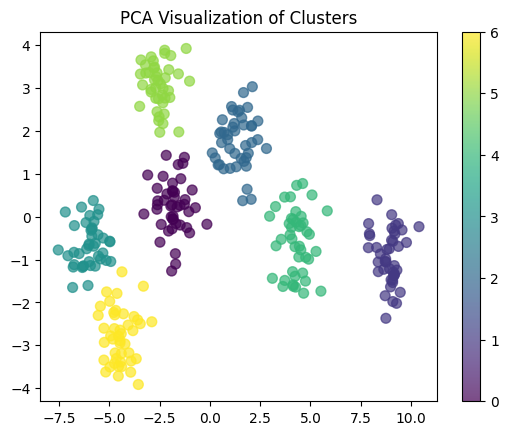

In [248]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('PCA Visualization of Clusters')
plt.colorbar()
plt.show()
